In [1]:
from scipy import integrate
import numpy as np

In [2]:
def phi(u,kappa_,S0_,r_,tau_,theta_,rho_,sigma_,V0_):
    gamma_ = np.sqrt((sigma_**2)*(u**2+u*1j)+(kappa_-1j*rho_*sigma_*u)**2)
    a = 1j*u*np.log(S0_) + 1j*u*r_*tau_+kappa_*theta_*tau_*(kappa_-1j*rho_*sigma_*u)/(sigma_**2)
    b = (u**2+1j*u)*V0_/(gamma_*np.cosh(gamma_*tau_/2)/np.sinh(gamma_*tau_/2)+kappa_-1j*rho_*sigma_*u)
    c = np.cosh(gamma_*tau_/2)+((kappa_-1j*rho_*sigma_*u)/gamma_)*np.sinh(gamma_*tau_/2)
    d = 2*kappa_*theta_/(sigma_**2)
    return np.exp(a)*np.exp(-b)/(c**d)

On va prendre $\alpha = 1$ pour le calcul de C

In [3]:
def psi(nu_,alpha_,K_,r_,tau_,kappa_,S0_,theta_,rho_,sigma_,V0_):
    k_ = np.log(K_)
    F = phi(nu_-1j*(alpha_+1),kappa_,S0_,r_,tau_,theta_,rho_,sigma_,V0_)*np.exp(-1j*nu_*k_)
    d = (alpha_+1j*nu_)*(alpha_+1+1j*nu_)
    return np.exp(-r_*tau_-alpha_*k_)/np.pi*(F/d).real

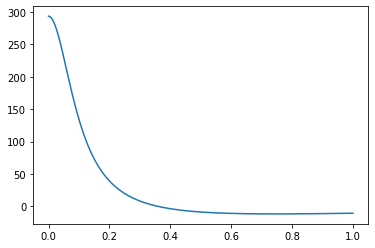

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
plt.plot(x,psi(x,0.1,90,0.03,0.5,2,100,0.04,-0.7,0.5,0.04))
plt.show()

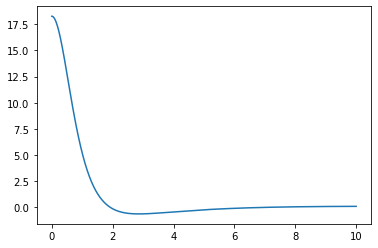

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
plt.plot(x,psi(x,1,90,0.03,0.5,2,100,0.04,-0.7,0.5,0.04))
plt.show()

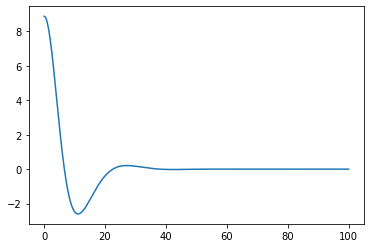

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 1000)
plt.plot(x,psi(x,20,90,0.03,0.5,2,100,0.04,-0.7,0.5,0.04))
plt.show()

In [7]:
import scipy as scp

def C(K_,alpha_,r_,tau_,kappa_,S0_,theta_,rho_,sigma_,V0_,L_):
    I = scp.integrate.quad(lambda nu_: psi(nu_,alpha_,K_,r_,tau_,kappa_,S0_,theta_,rho_,sigma_,V0_) , 0, L_)
    return I[0]

In [8]:
C(90,1,0.03,0.5,2,100,0.04,-0.7,0.5,0.04,50)

13.202583328370064